In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
from sklearn import metrics
import warnings
warnings.filterwarnings("ignore")

In [2]:
ls

 Volume in drive C is OS
 Volume Serial Number is 42A7-BDFB

 Directory of C:\Users\Narasimhulu E\Documents\Assingnments\Random Forests

05/08/2023  01:36 PM    <DIR>          .
04/26/2023  11:04 PM    <DIR>          ..
05/08/2023  01:36 PM    <DIR>          .ipynb_checkpoints
03/02/2023  07:47 PM            17,023 Company_Data (2).csv
03/02/2023  07:47 PM            21,837 Fraud_check (2).csv
03/02/2023  07:47 PM             1,378 problem statement(company data) (2).txt
03/02/2023  07:47 PM               133 Problem_statement(Fraudcheck) (3).txt
04/26/2023  02:33 PM         1,754,219 Random Forest (Fraud_check).ipynb
05/08/2023  01:35 PM         1,535,594 RANDOM FOREST(Company data.csv).ipynb
               6 File(s)      3,330,184 bytes
               3 Dir(s)  51,464,265,728 bytes free


In [3]:
fraud=pd.read_csv('Fraud_check (2).csv')

In [4]:
fraud

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [5]:
fraud.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [6]:
fraud.tail()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO
599,NO,Divorced,96519,158137,16,NO


# EDA

In [7]:
fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [8]:
fraud.isna().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [9]:
fraud[fraud['Taxable.Income']<=30000]

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
10,NO,Single,29732,102602,19,YES
12,NO,Divorced,11794,148033,14,YES
16,YES,Divorced,24987,34551,29,NO
19,NO,Single,10987,126953,30,YES
21,YES,Divorced,14310,29106,7,YES
...,...,...,...,...,...,...
544,NO,Single,29916,133877,21,YES
557,YES,Married,12810,157421,10,NO
567,YES,Single,16316,129912,30,NO
575,NO,Divorced,10735,95975,13,YES


In [10]:
gp=['Risky','Good']
fraud['Fraudcheck']=pd.cut(fraud['Taxable.Income'],bins=[0,30000,1000000],labels=gp)

In [11]:
for i in range(0,len(fraud['Taxable.Income'])):
    if fraud['Taxable.Income'][i]<=30000:
        fraud['Fraudcheck'][i] = 'Risky'
    else:
        fraud['Fraudcheck'][i]='Good'

In [12]:
fraud.head(7)

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,Fraudcheck
0,NO,Single,68833,50047,10,YES,Good
1,YES,Divorced,33700,134075,18,YES,Good
2,NO,Married,36925,160205,30,YES,Good
3,YES,Single,50190,193264,15,YES,Good
4,NO,Married,81002,27533,28,NO,Good
5,NO,Divorced,33329,116382,0,NO,Good
6,NO,Divorced,83357,80890,8,YES,Good


In [13]:
fraud['Taxable.Income'].describe()

count      600.000000
mean     55208.375000
std      26204.827597
min      10003.000000
25%      32871.500000
50%      55074.500000
75%      78611.750000
max      99619.000000
Name: Taxable.Income, dtype: float64

In [14]:
fraud['Fraudcheck'].value_counts()

Good     476
Risky    124
Name: Fraudcheck, dtype: int64

In [15]:
fraud.head(0)

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,Fraudcheck


In [16]:
fraud['Fraudcheck']=fraud['Fraudcheck'].replace(['Risky','Good'],[0,1])
fraud['Urban']=fraud['Urban'].replace(['YES','NO'],[1,0])
fraud['Undergrad']=fraud['Undergrad'].replace(['YES','NO'],[1,0])
fraud['Marital.Status']=fraud['Marital.Status'].replace(['Single','Divorced','Married'],[0,1,2])

In [17]:
fraud

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,Fraudcheck
0,0,0,68833,50047,10,1,1
1,1,1,33700,134075,18,1,1
2,0,2,36925,160205,30,1,1
3,1,0,50190,193264,15,1,1
4,0,2,81002,27533,28,0,1
...,...,...,...,...,...,...,...
595,1,1,76340,39492,7,1,1
596,1,1,69967,55369,2,1,1
597,0,1,47334,154058,0,1,1
598,1,2,98592,180083,17,0,1


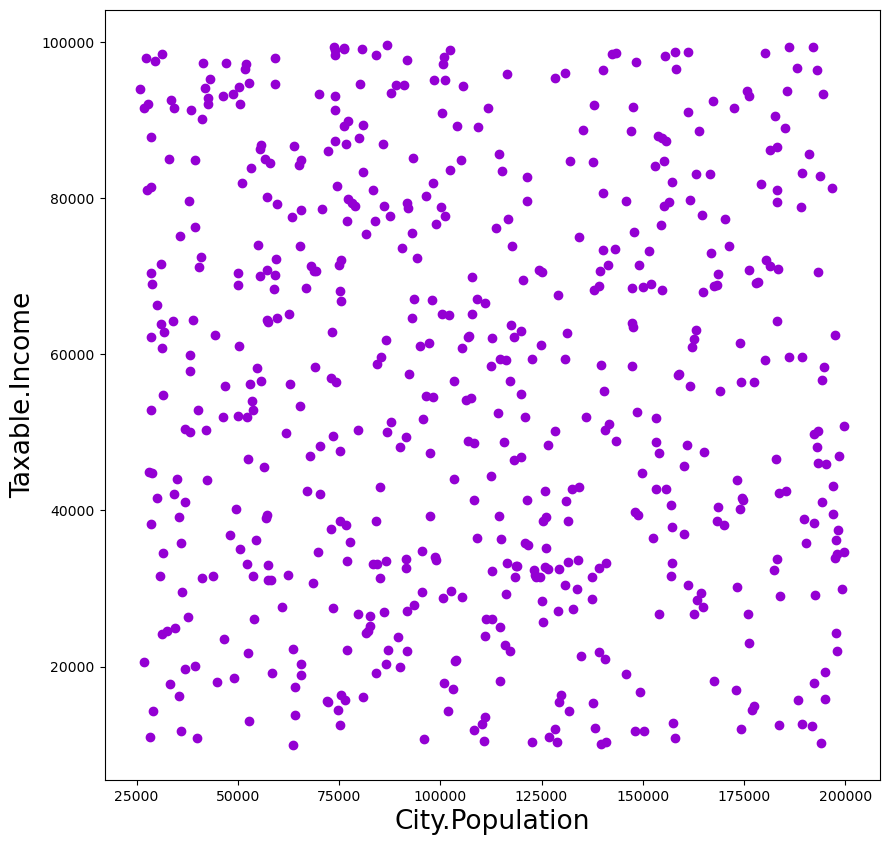

In [18]:
plt.figure(figsize=(10,10))
plt.scatter(fraud['City.Population'],fraud['Taxable.Income'],color='darkviolet')
plt.ylabel("Taxable.Income",size=19)
plt.xlabel("City.Population",size=19)
plt.show()

In [19]:
fraud['Fraudcheck'].value_counts()

1    476
0    124
Name: Fraudcheck, dtype: int64

In [20]:
fraud['Marital.Status'].value_counts()

0    217
2    194
1    189
Name: Marital.Status, dtype: int64

In [21]:
fraud['Urban'].value_counts()

1    302
0    298
Name: Urban, dtype: int64

# SPLITTING THE DATA

In [22]:
fraud.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,Fraudcheck
0,0,0,68833,50047,10,1,1
1,1,1,33700,134075,18,1,1
2,0,2,36925,160205,30,1,1
3,1,0,50190,193264,15,1,1
4,0,2,81002,27533,28,0,1


In [23]:
fraud.columns

Index(['Undergrad', 'Marital.Status', 'Taxable.Income', 'City.Population',
       'Work.Experience', 'Urban', 'Fraudcheck'],
      dtype='object')

In [24]:
fraud1=fraud[['Undergrad','Marital.Status','City.Population','Work.Experience','Urban','Fraudcheck']]

In [25]:
fraud1.head()

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban,Fraudcheck
0,0,0,50047,10,1,1
1,1,1,134075,18,1,1
2,0,2,160205,30,1,1
3,1,0,193264,15,1,1
4,0,2,27533,28,0,1


In [26]:
X=fraud1.iloc[:,:-1]
Y=fraud1.iloc[:,-1]

In [27]:
X.head()

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban
0,0,0,50047,10,1
1,1,1,134075,18,1
2,0,2,160205,30,1
3,1,0,193264,15,1
4,0,2,27533,28,0


In [28]:
Y.head()

0    1
1    1
2    1
3    1
4    1
Name: Fraudcheck, dtype: category
Categories (2, int64): [0 < 1]

In [29]:
fraud1.columns

Index(['Undergrad', 'Marital.Status', 'City.Population', 'Work.Experience',
       'Urban', 'Fraudcheck'],
      dtype='object')

# SPLITTING DATA INTO TRAIN AND TEST

In [30]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=10)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((480, 5), (120, 5), (480,), (120,))

In [31]:
x_train

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban
284,0,1,188383,22,1
423,0,2,80249,19,1
525,1,0,75307,23,0
519,1,0,162102,25,1
12,0,1,148033,14,1
...,...,...,...,...,...
369,0,2,89122,28,0
320,1,0,78897,11,1
527,0,2,180274,27,0
125,1,1,155669,11,0


In [32]:
y_train

284    0
423    1
525    1
519    1
12     0
      ..
369    1
320    1
527    1
125    1
265    0
Name: Fraudcheck, Length: 480, dtype: category
Categories (2, int64): [0 < 1]

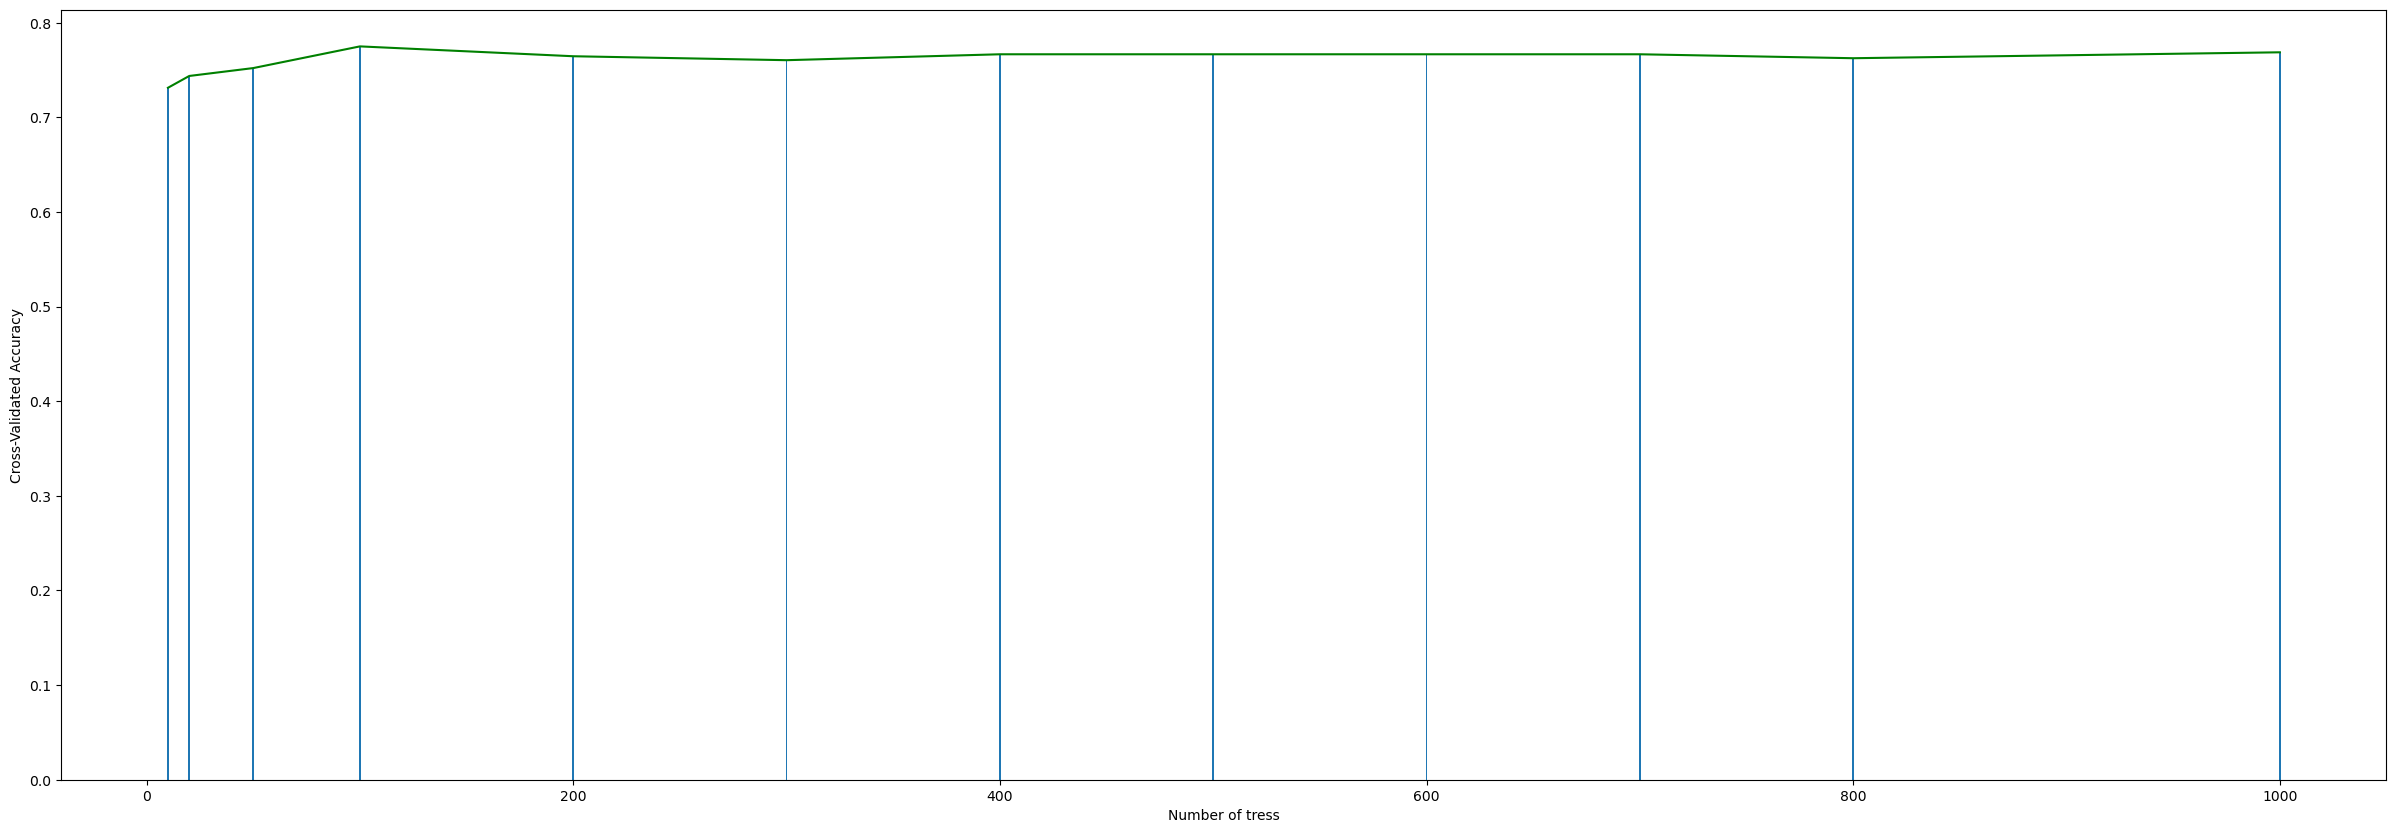

In [33]:
import matplotlib.pyplot as plt 
%matplotlib inline
# choose k between 1 to 41
num_trees = [10,20,50,100,200,300,400,500,600,700,800,1000]
nf=[2,3,4,5,6]
k_scores = []




for k in num_trees:

    fraud = RandomForestClassifier(n_estimators=k)
    scores = cross_val_score(fraud, x_train, y_train, cv=10)
    k_scores.append(scores.mean())

plt.figure(figsize=(30,10))
plt.bar(num_trees, k_scores)
plt.plot(num_trees, k_scores,color="green")

plt.xlabel('Number of tress')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

# GRID SEARCH CV TO FIND BEST HYPERPARAMETER

In [34]:
from sklearn.model_selection import GridSearchCV

In [35]:
model=RandomForestClassifier()
parameters={
    
    "n_estimators":[130,140,150,160],
    "max_features":[2,3,4,5]
}

In [36]:
G_dt=GridSearchCV(model,parameters,cv=10)

In [37]:
G_dt.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(),
             param_grid={'max_features': [2, 3, 4, 5],
                         'n_estimators': [130, 140, 150, 160]})

In [38]:
G_dt.best_score_

0.7645833333333333

In [39]:
G_dt.best_params_

{'max_features': 2, 'n_estimators': 140}

In [40]:
model2=RandomForestClassifier(max_features=2,n_estimators=130)

In [41]:
model2.fit(x_train,y_train)

RandomForestClassifier(max_features=2, n_estimators=130)

In [42]:
print(classification_report(y_test,model2.predict(x_test)))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        26
           1       0.77      0.91      0.83        94

    accuracy                           0.72       120
   macro avg       0.38      0.46      0.42       120
weighted avg       0.60      0.72      0.65       120



In [43]:
model2.feature_importances_

array([0.03084158, 0.06539612, 0.5303717 , 0.33548642, 0.03790418])

# GINI INDEX WITH TREE ESTIMATORS

In [44]:
model=DecisionTreeClassifier(criterion='gini',min_samples_split=6)
model.fit(x_train,y_train)

DecisionTreeClassifier(min_samples_split=6)

In [45]:
pred=G_dt.predict(x_test)
pd.Series(pred).value_counts()

1    111
0      9
dtype: int64

In [46]:
metrics.accuracy_score(y_test,pred)

0.7083333333333334

In [47]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        26
           1       0.77      0.90      0.83        94

    accuracy                           0.71       120
   macro avg       0.38      0.45      0.41       120
weighted avg       0.60      0.71      0.65       120



In [48]:
print(confusion_matrix(y_test,pred))

[[ 0 26]
 [ 9 85]]


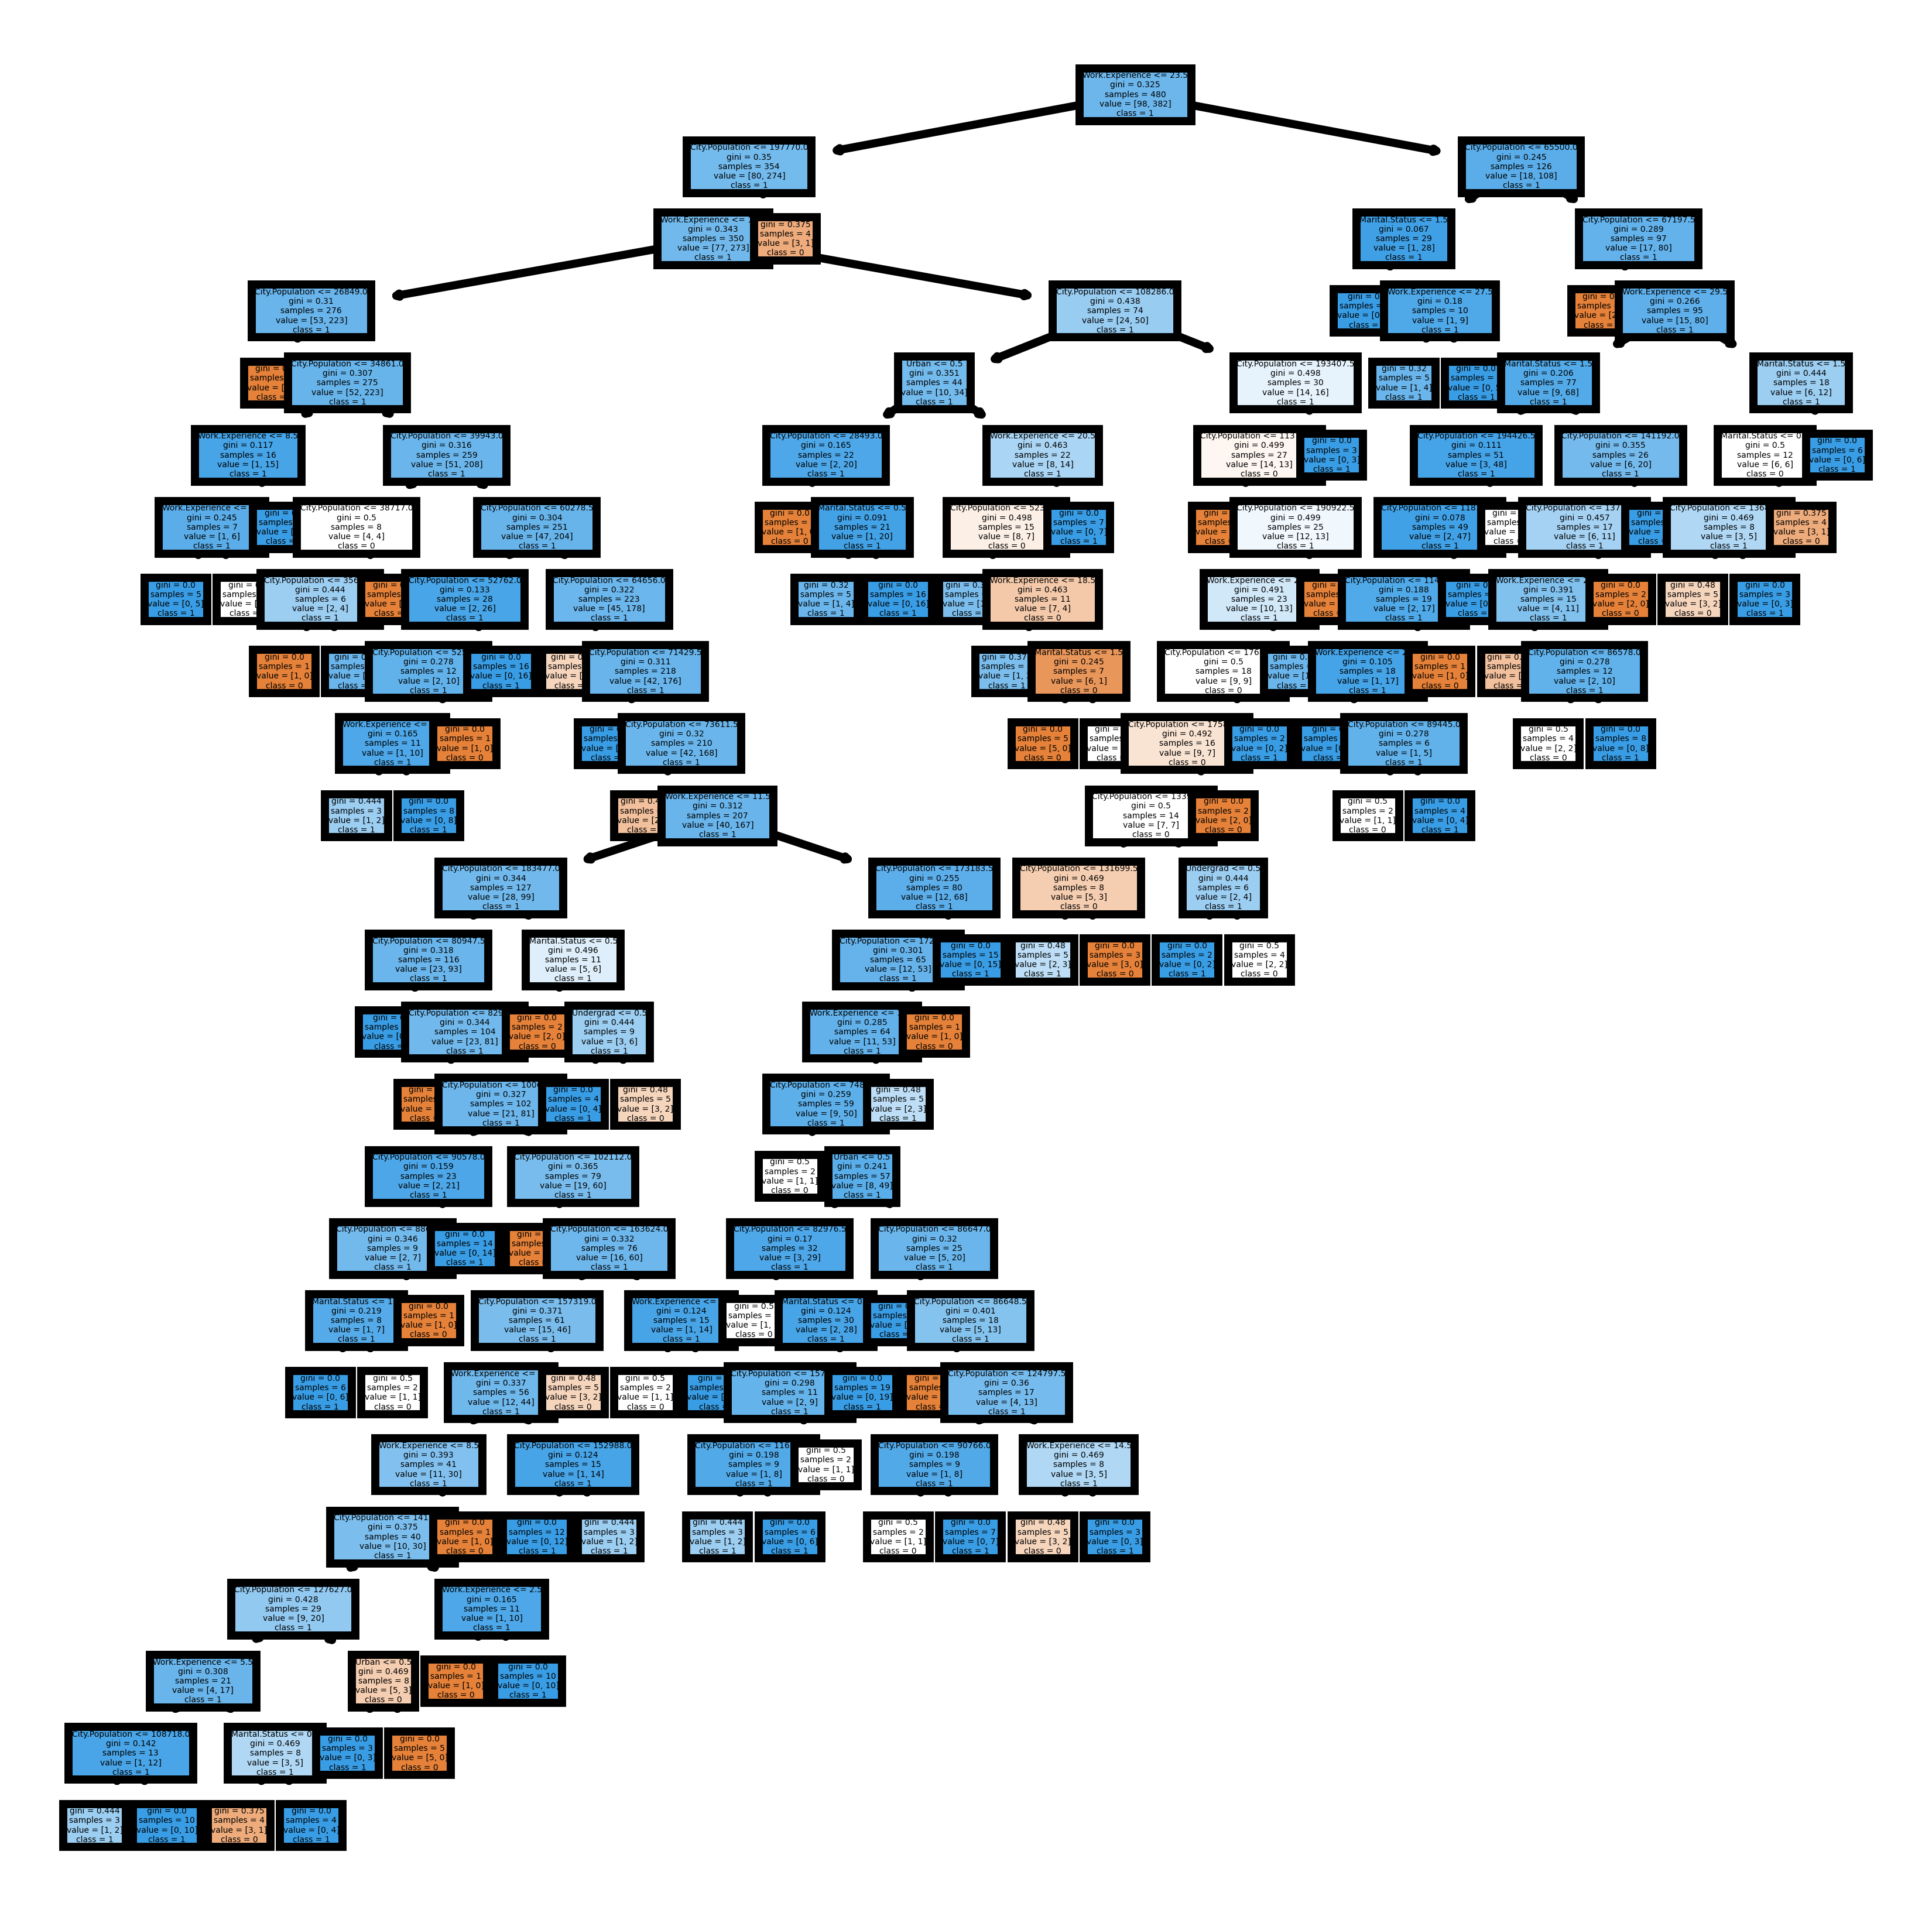

In [49]:
fe=['Undergrad', 'Marital.Status', 'City.Population', 'Work.Experience','Urban']
ta=['0','1']
fig,axes=plt.subplots(figsize=(4,4),dpi=1000)
tree.plot_tree(model,feature_names=fe,class_names=ta,filled=True);
plt.show()
